In [115]:
import pandas as pd
import datetime
import numpy as np
import requests
from io import StringIO
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# 1.時系列データの記述・処理
## 1.5 移動平均

In [7]:
url = 'https://www.mizuhobank.co.jp/market/csv/m_quote.csv'
df = pd.read_csv(StringIO(requests.get(url).text), parse_dates=[0], index_col=[0], skiprows=[0], na_values='*****')
df.head()

,USD,GBP,EUR,CAD,CHF,SEK,DKK,NOK,AUD,NZD,...,HUF,CZK,PLN,RUB,TRY,IDR(100).1,CNY.1,MYR.1,KRW(100).1,TWD
2002-04-30,131.15,189.01,115.97,82.83,79.13,12.73,15.61,15.20,70.24,58.08,...,NaN,NaN,NaN,NaN,NaN,1.39,15.84,NaN,9.99,3.77
2002-05-31,126.44,184.56,115.88,81.58,79.60,12.57,15.59,15.43,69.58,58.38,...,NaN,NaN,NaN,NaN,NaN,1.41,15.28,NaN,10.10,3.68
2002-06-28,123.53,183.00,117.83,80.64,80.09,12.94,15.86,15.92,70.29,60.48,...,NaN,NaN,NaN,NaN,NaN,1.44,14.93,NaN,10.20,3.66
2002-07-31,118.05,183.64,117.23,76.52,80.16,12.67,15.79,15.83,65.42,56.82,...,NaN,NaN,NaN,NaN,NaN,1.34,14.26,NaN,9.98,3.56
2002-08-30,119.08,183.14,116.45,75.85,79.60,12.59,15.69,15.68,64.47,55.28,...,NaN,NaN,NaN,NaN,NaN,1.35,14.39,NaN,9.97,3.53


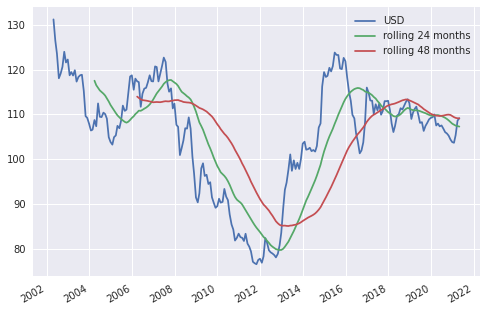

In [13]:
df['USD'].plot()
df['USD'].rolling(24).mean().plot()
df['USD'].rolling(48).mean().plot()
plt.legend(['USD', 'rolling 24 months', 'rolling 48 months'])
plt.show()

## 1.6 中心化移動平均

偶数の場合は注意しないといけない!

例えば月次の7月の中心化移動平均の値がほしいとする。1月から12月のデータで計算すると6.5月のデータになる。一方2月から翌年1月であると7.5月のデータとなる。よって、これらの2つの平均をとってようやく7月の中心化移動平均の値が得られる。

実際に金融データの予測においては中心化移動平均を利用することがないと思われるので気にする必要はないはず。

In [80]:
url = 'https://oku.edu.mie-u.ac.jp/~okumura/stat/data/icecream.csv'
df = pd.read_csv(url, skiprows=[0], encoding='CP932')
df.head()

,年,月,アイスクリーム
0,2003,1,331
1,2003,2,268
2,2003,3,365
3,2003,4,492
4,2003,5,632


In [81]:
df.index = [datetime.date(x['年'], x['月'], 1) + pd.tseries.offsets.MonthEnd(0) for i, x in df.iterrows()]
df.rename(columns={'アイスクリーム': 'ice cream'}, inplace=True)
coln_l = ['ice cream']
df = df.filter(coln_l, axis='columns')
df.head()

,ice cream
2003-01-31,331
2003-02-28,268
2003-03-31,365
2003-04-30,492
2003-05-31,632


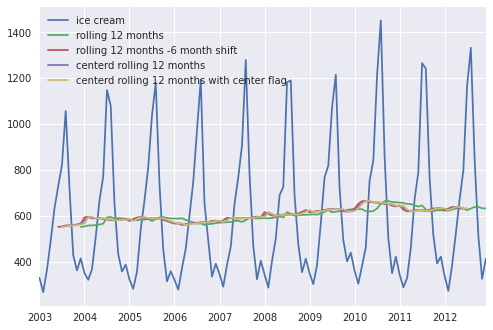

In [82]:
df['ice cream'].plot()
df['ice cream'].rolling(window=12).mean().plot()
df['ice cream'].rolling(window=12).mean().shift(-6).plot()
df['ice cream'].rolling(window=12).mean().shift(-6).rolling(window=2).mean().plot()
df['ice cream'].rolling(window=12, center=True).mean().plot()
plt.legend(['ice cream', 'rolling 12 months', 'rolling 12 months -6 month shift', 'centerd rolling 12 months', 'centerd rolling 12 months with center flag'])
plt.show()

中心化移動平均を自分で計算した場合と、rolling関数を利用した場合の違い。
わずかに計算値が異なる。
中心化移動平均の定義とcenter=Trueの挙動の定義をしっかり調べないといけないが自分で計算したほうがよさそう。

In [83]:
df['ice cream'].rolling(window=12).mean().shift(-6).rolling(window=2).mean().head(20)

2003-01-31           NaN
2003-02-28           NaN
2003-03-31           NaN
2003-04-30           NaN
2003-05-31           NaN
2003-06-30           NaN
2003-07-31    553.166667
2003-08-31    556.250000
2003-09-30    558.583333
2003-10-31    559.333333
2003-11-30    561.458333
2003-12-31    564.666667
2004-01-31    580.041667
2004-02-29    594.625000
2004-03-31    592.625000
2004-04-30    589.833333
2004-05-31    589.791667
2004-06-30    588.458333
2004-07-31    586.166667
2004-08-31    583.375000
Name: ice cream, dtype: float64

In [84]:
df['ice cream'].rolling(window=12, center=True).mean().head(20)

2003-01-31           NaN
2003-02-28           NaN
2003-03-31           NaN
2003-04-30           NaN
2003-05-31           NaN
2003-06-30           NaN
2003-07-31    552.333333
2003-08-31    554.000000
2003-09-30    558.500000
2003-10-31    558.666667
2003-11-30    560.000000
2003-12-31    562.916667
2004-01-31    566.416667
2004-02-29    593.666667
2004-03-31    595.583333
2004-04-30    589.666667
2004-05-31    590.000000
2004-06-30    589.583333
2004-07-31    587.333333
2004-08-31    585.000000
Name: ice cream, dtype: float64

## 1.7 季節調整

In [85]:
df = df.assign(
    cma12 = df['ice cream'].rolling(window=12).mean().shift(-6).rolling(window=2).mean()
)

In [86]:
df = df.assign(
    sxi = df['ice cream'].div(df['cma12']).mul(100)
)

In [87]:
df.head(10)

,ice cream,cma12,sxi
2003-01-31,331,NaN,NaN
2003-02-28,268,NaN,NaN
2003-03-31,365,NaN,NaN
2003-04-30,492,NaN,NaN
2003-05-31,632,NaN,NaN
2003-06-30,730,NaN,NaN
2003-07-31,821,553.166667,148.418198
2003-08-31,1057,556.250000,190.022472
2003-09-30,724,558.583333,129.613606
2003-10-31,430,559.333333,76.877235


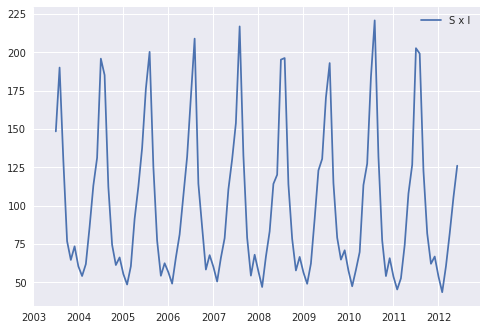

In [88]:
df['sxi'].plot()
plt.legend(['S x I'])
plt.show()

In [89]:
s_df = df.groupby(df.index.month)['sxi'].mean().to_frame()
s_df.rename(columns={'sxi': 's'}, inplace=True)
s_df.loc[:, 's'] = s_df['s'].div(s_df['s'].sum()).mul(1200)
s_df = s_df.assign(
    month = s_df.index
)
s_df

,s,month
1,57.053746,1
2,48.493579,2
3,61.871001,3
4,82.340666,4
5,112.219454,5
6,129.501859,6
7,178.039938,7
8,201.785124,8
9,122.395602,9
10,79.214033,10


In [90]:
s_df['s'].sum()

1199.9999999999995

In [91]:
df = df.assign(
    month = df.index.month
)

In [93]:
df = df.reset_index().merge(
    s_df,
    how='left',
    on='month',
).set_index('index')
df

,ice cream,cma12,sxi,month,s
index,,,,,
2003-01-31,331,NaN,NaN,1,57.053746
2003-02-28,268,NaN,NaN,2,48.493579
2003-03-31,365,NaN,NaN,3,61.871001
2003-04-30,492,NaN,NaN,4,82.340666
2003-05-31,632,NaN,NaN,5,112.219454
...,...,...,...,...,...
2012-08-31,1332,NaN,NaN,8,201.785124
2012-09-30,849,NaN,NaN,9,122.395602
2012-10-31,515,NaN,NaN,10,79.214033


In [94]:
df = df.assign(
    adjusted = df['ice cream'].div(df['s']).mul(100)
)
df

,ice cream,cma12,sxi,month,s,adjusted
index,,,,,,
2003-01-31,331,NaN,NaN,1,57.053746,580.154716
2003-02-28,268,NaN,NaN,2,48.493579,552.650488
2003-03-31,365,NaN,NaN,3,61.871001,589.937118
2003-04-30,492,NaN,NaN,4,82.340666,597.517635
2003-05-31,632,NaN,NaN,5,112.219454,563.182210
...,...,...,...,...,...,...
2012-08-31,1332,NaN,NaN,8,201.785124,660.108127
2012-09-30,849,NaN,NaN,9,122.395602,693.652378
2012-10-31,515,NaN,NaN,10,79.214033,650.137333


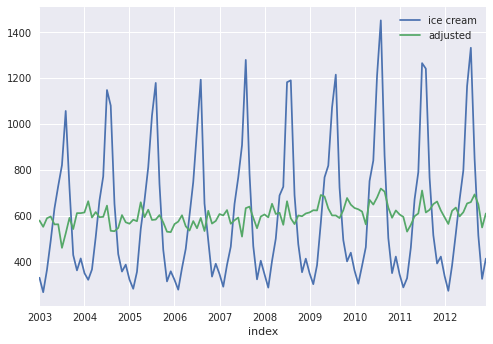

In [95]:
df[['ice cream', 'adjusted']].plot()
plt.show()

# 1.8 移動平均乖離率

In [96]:
url = 'https://www.mizuhobank.co.jp/market/csv/m_quote.csv'
df = pd.read_csv(StringIO(requests.get(url).text), parse_dates=[0], index_col=[0], skiprows=[0], na_values='*****')
df.head()

,USD,GBP,EUR,CAD,CHF,SEK,DKK,NOK,AUD,NZD,...,HUF,CZK,PLN,RUB,TRY,IDR(100).1,CNY.1,MYR.1,KRW(100).1,TWD
2002-04-30,131.15,189.01,115.97,82.83,79.13,12.73,15.61,15.20,70.24,58.08,...,NaN,NaN,NaN,NaN,NaN,1.39,15.84,NaN,9.99,3.77
2002-05-31,126.44,184.56,115.88,81.58,79.60,12.57,15.59,15.43,69.58,58.38,...,NaN,NaN,NaN,NaN,NaN,1.41,15.28,NaN,10.10,3.68
2002-06-28,123.53,183.00,117.83,80.64,80.09,12.94,15.86,15.92,70.29,60.48,...,NaN,NaN,NaN,NaN,NaN,1.44,14.93,NaN,10.20,3.66
2002-07-31,118.05,183.64,117.23,76.52,80.16,12.67,15.79,15.83,65.42,56.82,...,NaN,NaN,NaN,NaN,NaN,1.34,14.26,NaN,9.98,3.56
2002-08-30,119.08,183.14,116.45,75.85,79.60,12.59,15.69,15.68,64.47,55.28,...,NaN,NaN,NaN,NaN,NaN,1.35,14.39,NaN,9.97,3.53


In [97]:
df = df.assign(
    usd_ma24 = df['USD'].rolling(24).mean()
)
df = df.assign(
    diff_usd_ma24 = df['USD'].sub(df['usd_ma24']).div(df['usd_ma24']).mul(100),
)

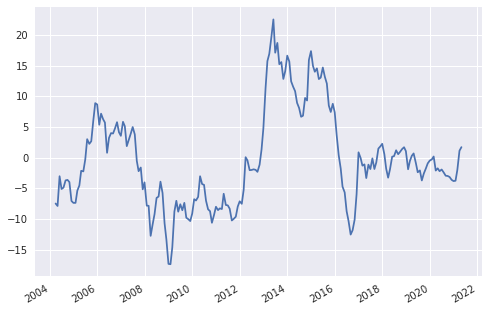

In [98]:
df['diff_usd_ma24'].plot()
plt.show()

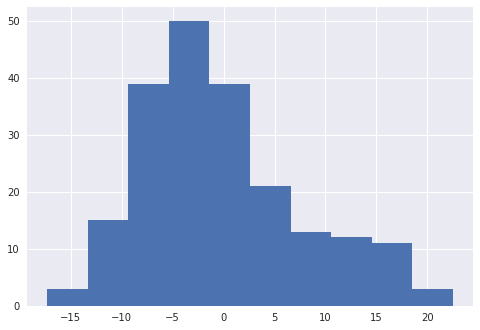

In [100]:
df['diff_usd_ma24'].hist()
plt.show()

## 1.9 時系列データの基本統計量と前処理

In [101]:
url = 'https://www.mizuhobank.co.jp/market/csv/m_quote.csv'
df = pd.read_csv(StringIO(requests.get(url).text), parse_dates=[0], index_col=[0], skiprows=[0], na_values='*****')
df.head()

,USD,GBP,EUR,CAD,CHF,SEK,DKK,NOK,AUD,NZD,...,HUF,CZK,PLN,RUB,TRY,IDR(100).1,CNY.1,MYR.1,KRW(100).1,TWD
2002-04-30,131.15,189.01,115.97,82.83,79.13,12.73,15.61,15.20,70.24,58.08,...,NaN,NaN,NaN,NaN,NaN,1.39,15.84,NaN,9.99,3.77
2002-05-31,126.44,184.56,115.88,81.58,79.60,12.57,15.59,15.43,69.58,58.38,...,NaN,NaN,NaN,NaN,NaN,1.41,15.28,NaN,10.10,3.68
2002-06-28,123.53,183.00,117.83,80.64,80.09,12.94,15.86,15.92,70.29,60.48,...,NaN,NaN,NaN,NaN,NaN,1.44,14.93,NaN,10.20,3.66
2002-07-31,118.05,183.64,117.23,76.52,80.16,12.67,15.79,15.83,65.42,56.82,...,NaN,NaN,NaN,NaN,NaN,1.34,14.26,NaN,9.98,3.56
2002-08-30,119.08,183.14,116.45,75.85,79.60,12.59,15.69,15.68,64.47,55.28,...,NaN,NaN,NaN,NaN,NaN,1.35,14.39,NaN,9.97,3.53


In [103]:
df = df.assign(
    usd_diff1 = df['USD'].diff(),
    usd_ln1 = df['USD'].apply(np.log),
    usd_diff_ln1 = df['USD'].pct_change().add(1).apply(np.log),
)
df

,USD,GBP,EUR,CAD,CHF,SEK,DKK,NOK,AUD,NZD,...,RUB,TRY,IDR(100).1,CNY.1,MYR.1,KRW(100).1,TWD,usd_diff1,usd_ln1,usd_diff_ln1
2002-04-30,131.15,189.01,115.97,82.83,79.13,12.73,15.61,15.20,70.24,58.08,...,NaN,NaN,1.39,15.84,NaN,9.99,3.77,NaN,4.876342,NaN
2002-05-31,126.44,184.56,115.88,81.58,79.60,12.57,15.59,15.43,69.58,58.38,...,NaN,NaN,1.41,15.28,NaN,10.10,3.68,-4.71,4.839768,-0.036574
2002-06-28,123.53,183.00,117.83,80.64,80.09,12.94,15.86,15.92,70.29,60.48,...,NaN,NaN,1.44,14.93,NaN,10.20,3.66,-2.91,4.816484,-0.023284
2002-07-31,118.05,183.64,117.23,76.52,80.16,12.67,15.79,15.83,65.42,56.82,...,NaN,NaN,1.34,14.26,NaN,9.98,3.56,-5.48,4.771108,-0.045376
2002-08-30,119.08,183.14,116.45,75.85,79.60,12.59,15.69,15.68,64.47,55.28,...,NaN,NaN,1.35,14.39,NaN,9.97,3.53,1.03,4.779796,0.008687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30,103.84,139.41,126.20,80.96,116.73,12.40,16.96,11.91,78.02,73.53,...,1.40,13.44,0.74,NaN,25.60,9.49,3.68,-0.57,4.642851,-0.005474
2021-01-29,103.69,141.49,126.23,81.51,116.97,12.51,16.97,12.18,80.09,74.58,...,1.40,14.00,0.74,NaN,25.70,9.44,3.70,-0.15,4.641406,-0.001446
2021-02-26,105.38,145.93,127.41,82.94,117.42,12.64,17.13,12.40,81.60,76.26,...,1.42,14.86,0.75,NaN,26.06,9.48,3.77,1.69,4.657573,0.016167
2021-03-31,108.63,150.62,129.41,86.37,116.99,12.74,17.40,12.74,83.75,77.60,...,1.46,14.15,0.76,NaN,26.46,9.61,3.85,3.25,4.687948,0.030375


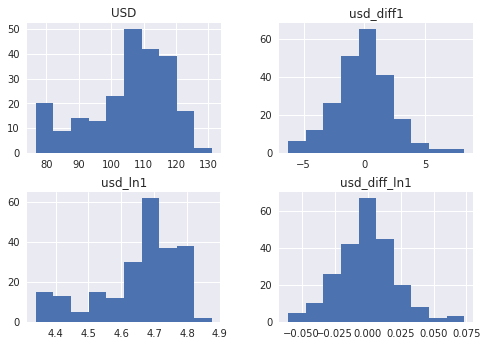

In [104]:
df[['USD', 'usd_diff1', 'usd_ln1', 'usd_diff_ln1']].hist()
plt.show()

In [110]:
stats.shapiro(df['USD'])

ShapiroResult(statistic=0.928795337677002, pvalue=4.5171550944189676e-09)

In [111]:
stats.shapiro(df['usd_diff1'])

ShapiroResult(statistic=nan, pvalue=1.0)

In [112]:
stats.shapiro(df['usd_ln1'])

ShapiroResult(statistic=0.8992414474487305, pvalue=2.8356312090083158e-11)

In [113]:
stats.shapiro(df['usd_diff_ln1'])

ShapiroResult(statistic=nan, pvalue=1.0)

In [119]:
url = 'https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv'
df = pd.read_csv(StringIO(requests.get(url).text), parse_dates=[0], index_col=[0])
df.index = [x + pd.tseries.offsets.MonthEnd(1) for x in df.index]
df.head()

,#Passengers
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


In [120]:
sm.tsa.stattools.acf(df['#Passengers'])

/home/ktymdiskmobilenote/work/advanced_time_series_analysis/.venv/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/home/ktymdiskmobilenote/work/advanced_time_series_analysis/.venv/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376, 0.48248203, 0.51712699, 0.53218983,
       0.49397569, 0.43772134, 0.3876029 , 0.34802503, 0.31498388,
       0.28849682, 0.27080187, 0.26429011, 0.27679934, 0.2985215 ,
       0.32558712, 0.3370236 , 0.30333486, 0.25397708, 0.21065534,
       0.17217092])

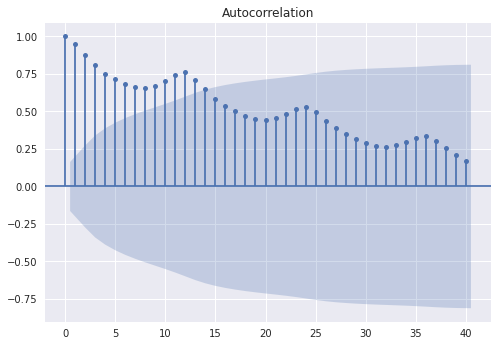

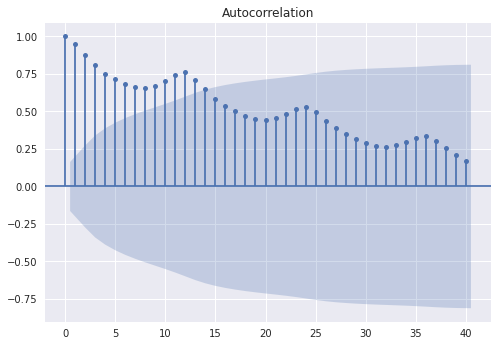

In [121]:
sm.graphics.tsa.plot_acf(df['#Passengers'], lags=40)

In [123]:
sm.tsa.stattools.pacf(df['#Passengers'], nlags=40, method='ols')

array([ 1.        ,  0.95893198, -0.32983096,  0.2018249 ,  0.14500798,
        0.25848232, -0.02690283,  0.20433019,  0.15607896,  0.56860841,
        0.29256358,  0.8402143 ,  0.61268285, -0.66597616, -0.38463943,
        0.0787466 , -0.02663483, -0.05805221, -0.04350748,  0.27732556,
       -0.04046447,  0.13739883,  0.3859958 ,  0.24203808, -0.04912986,
       -0.19599778, -0.15443575,  0.04484465,  0.18371541, -0.0906113 ,
       -0.06202938,  0.34827092,  0.09899499, -0.08396793,  0.36328898,
       -0.17956662,  0.15839435,  0.06376775, -0.27503705,  0.2707607 ,
        0.32002003])

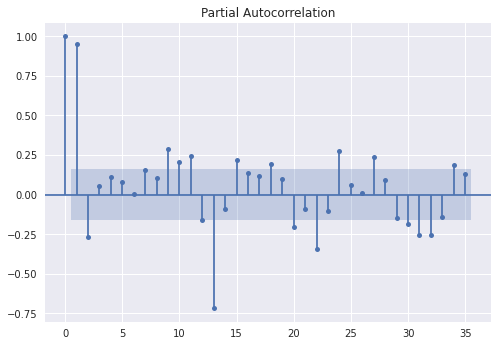

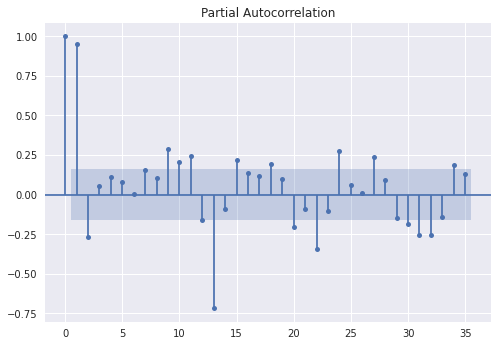

In [125]:
sm.graphics.tsa.plot_pacf(df['#Passengers'],lags=35)